In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import tabletext


In [2]:
video_game = pd.read_csv("/Users/specky3512/GitHub/Project 1/Game sales files/Video_Games_Sales_as_at_22_Dec_2016.csv")
xbox1 = pd.read_csv("/Users/specky3512/GitHub/Project 1/Game sales files/Xbox One Sales.csv")
ps4 = pd.read_csv("/Users/specky3512/GitHub/Project 1/Game sales files/PS4 Sales.csv")
video_game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
video_gameworatings = video_game[['Name','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
video_gameworatings.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
ps4['Platform'] = 'PS4'
ps4 = ps4.rename(columns = {'Game':'Name', 'Year':'Year_of_Release', 'North America':'NA_Sales', 'Europe':'EU_Sales', 'Japan':'JP_Sales', 'Rest of World': 'Other_Sales', 'Global':'Global_Sales'})
ps4 = ps4[['Name','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
# ps4 = ps4[['Game': "Name", 'Platform', 'Year':'Year_of_Release', "Genre", "Publisher", "North America":"NA_Sales"]]
ps4.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,PS4,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,PS4,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,PS4,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,PS4,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [5]:
xbox1['Platform'] = 'Xbox One'
xbox1 = xbox1.rename(columns = {'Game':'Name', 'Year':'Year_of_Release', 'North America':'NA_Sales', 'Europe':'EU_Sales', 'Japan':'JP_Sales', 'Rest of World': 'Other_Sales', 'Global':'Global_Sales'})
xbox1 = xbox1[['Name','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
# ps4 = ps4[['Game': "Name", 'Platform', 'Year':'Year_of_Release', "Genre", "Publisher", "North America":"NA_Sales"]]
xbox1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,Xbox One,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,Call of Duty: Black Ops 3,Xbox One,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,Call of Duty: WWII,Xbox One,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,Red Dead Redemption 2,Xbox One,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,MineCraft,Xbox One,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


In [6]:
dataframes = [video_gameworatings, ps4, xbox1]
mergeddata = pd.concat(dataframes)
mergeddata = mergeddata.loc[mergeddata['Year_of_Release']<=2016]
mergeddata = mergeddata.reset_index(drop=True)
mergeddata

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
17279,Alekhine's Gun,Xbox One,2016.0,Action,Maximum Games,0.00,0.00,0.00,0.00,0.00
17280,Super Dungeon Bros,Xbox One,2016.0,Action,Wired Productions,0.00,0.00,0.00,0.00,0.00
17281,Pro Cycling Manager 2016,Xbox One,2016.0,Sports,Focus Home Interactive,0.00,0.00,0.00,0.00,0.00
17282,We Sing (2016),Xbox One,2016.0,Music,THQ Nordic,0.00,0.00,0.00,0.00,0.00


In [7]:
publisher_count = mergeddata.groupby('Publisher')['Year_of_Release'].count()
publisher_info = pd.DataFrame(publisher_count)
publisher_info = publisher_info.rename(columns={'Year_of_Release': '# of Games Released'})
publisher_info = publisher_info.reset_index()
publisher_total_NA = mergeddata.groupby('Publisher')['NA_Sales'].sum()
publisher_total_EU = mergeddata.groupby('Publisher')['EU_Sales'].sum()
publisher_total_JP = mergeddata.groupby('Publisher')['JP_Sales'].sum()
publisher_total_Other = mergeddata.groupby('Publisher')['Other_Sales'].sum()
publisher_total_Global = mergeddata.groupby('Publisher')['Global_Sales'].sum()
publisher_info = pd.merge(publisher_info, publisher_total_NA, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_EU, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_JP, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_Other, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_Global, on = "Publisher")
publisher_info.sort_values(by='Global_Sales', ascending = False).head(20)

,Publisher,# of Games Released,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
386,Nintendo,700,815.86,418.58,457.74,94.55,1786.72
150,Electronic Arts,1375,616.82,402.08,15.63,136.10,1170.91
25,Activision,1028,467.90,242.01,7.79,86.05,803.83
491,Sony Computer Entertainment,710,282.12,204.36,75.79,86.34,648.53
573,Ubisoft,1000,278.56,191.72,8.68,57.94,537.09
534,Take-Two Interactive,423,223.69,119.95,5.93,55.95,405.50
527,THQ,712,207.55,93.66,5.01,31.87,338.11
296,Konami Digital Entertainment,840,91.30,71.74,92.48,30.63,286.35
373,Namco Bandai Games,984,78.27,50.21,130.51,17.44,276.54
479,Sega,641,109.29,81.36,57.30,24.04,272.20


In [8]:
def  stats(a, b):
    quartilesval = a.quantile([.25, .5, .75])
    lowerq = quartilesval[.25]
    upperq = quartilesval[.75]
    iqr = upperq-lowerq
    lowerbound = lowerq - (iqr*1.5)
    upperbound = upperq + (iqr*1.5)
    upperoutliers = b.loc[a >= upperbound]
    loweroutliers = b.loc[a <= lowerbound]
    outliers=pd.concat([upperoutliers, loweroutliers])
    print(f'The statistical analysis states that there are {len(outliers)} outliers')
    print(f'the upper bound is {upperbound} and the lower bound is {lowerbound}')
    

def linearregress(x,y,a,b):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = 'y=' + str(round(slope,2)) +'x+' + str(round(intercept,2))
    plt.scatter(x,y, color='blue')
    plt.plot(x,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(a,b),fontsize=15, color='red')
    plt.grid()
    
    
   

The statistical analysis states that there are 91 outliers
the upper bound is 3.9287500000000017 and the lower bound is -2.261250000000001
The r-square is 0.8078174644284765
y=0.72x+-4.61


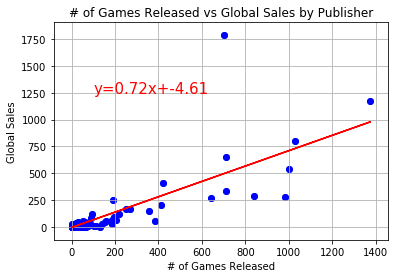

In [9]:
x_release = publisher_info['# of Games Released']
y_global_sales = publisher_info['Global_Sales']
plt.scatter(x_release,y_global_sales)
stats(publisher_info['Global_Sales'], publisher_info)
plt.xlabel('# of Games Released')
plt.ylabel('Global Sales')
plt.title('# of Games Released vs Global Sales by Publisher')
linearregress(x_release, y_global_sales, 100, 1250)


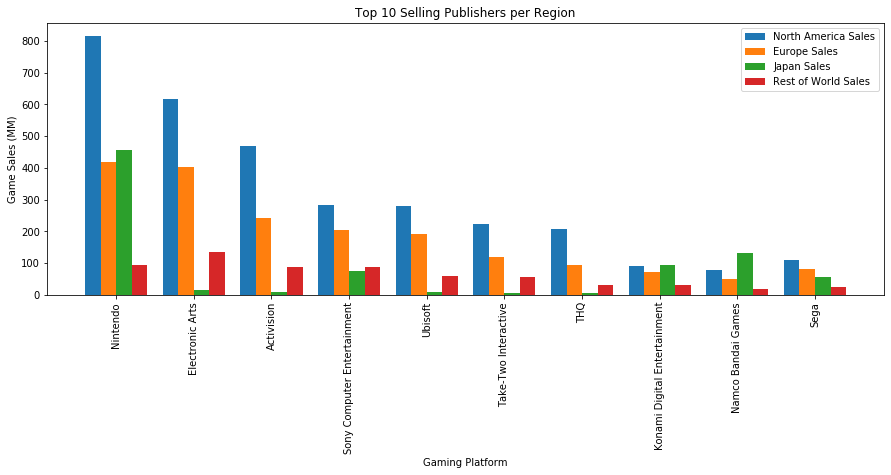

In [10]:
sorted_pub_info = publisher_info.sort_values(by='Global_Sales', ascending=False).head(10)
x_positon = np.arange(len(sorted_pub_info))
objects = sorted_pub_info['Publisher']
Data = publisher_info[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
w=0.2
list_legend = ["North America Sales", "Europe Sales", "Japan Sales", "Rest of World Sales", "Global Sales(total sum)"]

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,1,1)
NA=ax1.bar(x_positon-(w*2),sorted_pub_info['NA_Sales'],width = w)
EU=ax1.bar(x_positon-w,sorted_pub_info['EU_Sales'],width = w)
JP=ax1.bar(x_positon,sorted_pub_info['JP_Sales'],width = w)
OT=ax1.bar(x_positon+w,sorted_pub_info['Other_Sales'],width = w)
# GL=ax1.bar(x_positon+(w*2),byPlatform_df['Global_Sales'],width = w)
plt.xticks(x_positon-w/2,objects,rotation = 90)

ax1.legend([NA,EU,JP,OT],['North America Sales', 'Europe Sales', 'Japan Sales', 'Rest of World Sales'])
plt.xlabel('Gaming Platform')
plt.ylabel('Game Sales (MM)')
plt.title('Top 10 Selling Publishers per Region')
plt.show()


In [22]:
byPlatform = mergeddata.groupby('Platform')['Global_Sales'].sum()
byPlatform_df=pd.DataFrame(byPlatform)
byPlatform_df = byPlatform_df.reset_index()
numbofgames = mergeddata.groupby('Platform')['Name'].count()
byPlatform_df = pd.merge(byPlatform_df, numbofgames, on = "Platform")
byPlatform_df = byPlatform_df.rename(columns = {'Name':'# of games released per platform'})
NAPlatform = mergeddata.groupby('Platform')['NA_Sales'].sum()
JPPlatform = mergeddata.groupby('Platform')['JP_Sales'].sum()
EUPlatform = mergeddata.groupby('Platform')['EU_Sales'].sum()
OtherPlatform = mergeddata.groupby('Platform')['Other_Sales'].sum()
byPlatform_df = pd.merge(byPlatform_df, NAPlatform, on = "Platform")
byPlatform_df = pd.merge(byPlatform_df, EUPlatform, on = "Platform")
byPlatform_df = pd.merge(byPlatform_df, JPPlatform, on = "Platform")
byPlatform_df = pd.merge(byPlatform_df, OtherPlatform, on = "Platform")
byPlatform_df = byPlatform_df[["Platform","# of games released per platform","Global_Sales","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
byPlatform_df.sort_values(by='Global_Sales', ascending = False).head(20)
# print(byPlatform_df["Global_Sales"].sum())
# PC = byPlatform_df.loc[byPlatform_df['Platform'] == 'PC']

# print(PC['Global_Sales'].sum()/byPlatform_df["Global_Sales"].sum())

9443.439999999955
0.0271680658743003


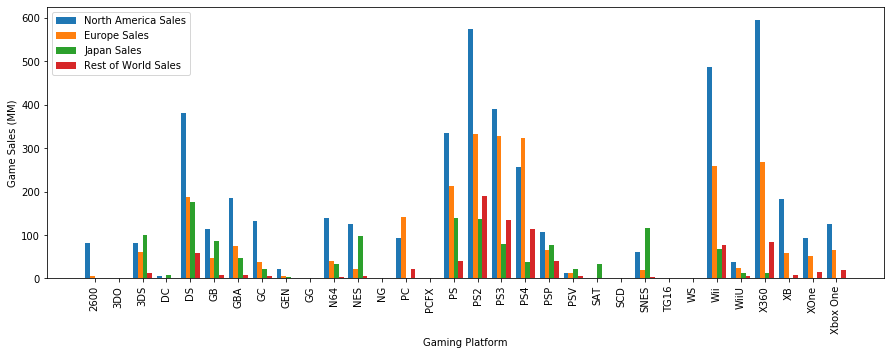

In [12]:
x_positon = np.arange(len(byPlatform_df['Platform']))
objects = byPlatform_df['Platform']
Data = byPlatform_df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
w=0.2
list_legend = ["North America Sales", "Europe Sales", "Japan Sales", "Rest of World Sales", "Global Sales(total sum)"]

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,1,1)
NA=ax1.bar(x_positon-(w*2),byPlatform_df['NA_Sales'],width = w)
EU=ax1.bar(x_positon-w,byPlatform_df['EU_Sales'],width = w)
JP=ax1.bar(x_positon,byPlatform_df['JP_Sales'],width = w)
OT=ax1.bar(x_positon+w,byPlatform_df['Other_Sales'],width = w)
# GL=ax1.bar(x_positon+(w*2),byPlatform_df['Global_Sales'],width = w)
plt.xticks(x_positon-w/2,objects,rotation = 90)

ax1.legend([NA,EU,JP,OT],['North America Sales', 'Europe Sales', 'Japan Sales', 'Rest of World Sales'])
plt.xlabel('Gaming Platform')
plt.ylabel('Game Sales (MM)')
plt.show()


In [13]:
JP_best_selling_consols = byPlatform_df.loc[byPlatform_df['JP_Sales']>byPlatform_df['NA_Sales']]
JP_best_selling_consols = JP_best_selling_consols.loc[JP_best_selling_consols['JP_Sales']>JP_best_selling_consols['EU_Sales']]
JP_best_selling_consols = JP_best_selling_consols.loc[JP_best_selling_consols['JP_Sales']>JP_best_selling_consols['Other_Sales']]
JP_best_selling_consols=JP_best_selling_consols.sort_values(by='JP_Sales', ascending = False)

NA_best_selling_consols = byPlatform_df.loc[byPlatform_df['NA_Sales']>byPlatform_df['JP_Sales']]
NA_best_selling_consols = NA_best_selling_consols.loc[NA_best_selling_consols['NA_Sales']>NA_best_selling_consols['EU_Sales']]
NA_best_selling_consols = NA_best_selling_consols.loc[NA_best_selling_consols['NA_Sales']>NA_best_selling_consols['Other_Sales']]
NA_best_selling_consols=NA_best_selling_consols.sort_values(by='NA_Sales', ascending = False)


EU_best_selling_consols = byPlatform_df.loc[byPlatform_df['EU_Sales']>byPlatform_df['NA_Sales']]
EU_best_selling_consols = EU_best_selling_consols.loc[EU_best_selling_consols['EU_Sales']>EU_best_selling_consols['JP_Sales']]
EU_best_selling_consols = EU_best_selling_consols.loc[EU_best_selling_consols['EU_Sales']>EU_best_selling_consols['Other_Sales']]
EU_best_selling_consols=EU_best_selling_consols.sort_values(by='EU_Sales', ascending = False)


Other_best_selling_consols = byPlatform_df.loc[byPlatform_df['Other_Sales']>byPlatform_df['NA_Sales']]
Other_best_selling_consols = Other_best_selling_consols.loc[Other_best_selling_consols['Other_Sales']>Other_best_selling_consols['EU_Sales']]
Other_best_selling_consols = Other_best_selling_consols.loc[Other_best_selling_consols['Other_Sales']>Other_best_selling_consols['JP_Sales']]
Other_best_selling_consols=Other_best_selling_consols.sort_values(by='Other_Sales', ascending = False)


print("-"*50)
print('The consols that have more sales in Japan than the rest of the world')
print(JP_best_selling_consols['Platform'].reset_index(drop=True))
print("-"*50)
print('The consols that have more sales in North America than the rest of the world')
print(NA_best_selling_consols['Platform'].reset_index(drop=True))
print("-"*50)
print('The consols that have more sales in Europe than the rest of the world')
print(EU_best_selling_consols['Platform'].reset_index(drop=True))
print("-"*50)
print('The consols that have more sales in "Other" than the rest of the world')
print(Other_best_selling_consols['Platform'].reset_index(drop=True))
print("-"*50)

--------------------------------------------------
The consols that have more sales in Japan than the rest of the world
0     SNES
1      3DS
2      SAT
3      PSV
4       DC
5       NG
6       WS
7     TG16
8      3DO
9       GG
10    PCFX
Name: Platform, dtype: object
--------------------------------------------------
The consols that have more sales in North America than the rest of the world
0         X360
1          PS2
2          Wii
3          PS3
4           DS
5           PS
6          GBA
7           XB
8          N64
9           GC
10         NES
11    Xbox One
12          GB
13         PSP
14        XOne
15        2600
16        WiiU
17         GEN
18         SCD
Name: Platform, dtype: object
--------------------------------------------------
The consols that have more sales in Europe than the rest of the world
0    PS4
1     PC
Name: Platform, dtype: object
--------------------------------------------------
The consols that have more sales in "Other" than the rest of the w

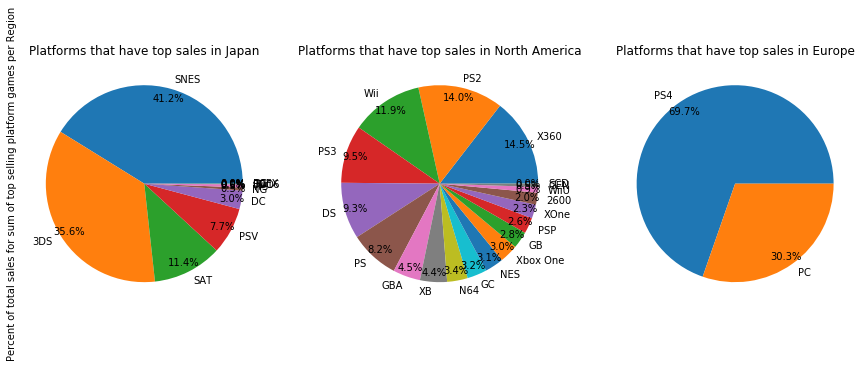

In [14]:
labelJP = JP_best_selling_consols['Platform']
labelNA = NA_best_selling_consols['Platform']
labelEU = EU_best_selling_consols['Platform']

yJP = JP_best_selling_consols['JP_Sales']
yNA = NA_best_selling_consols['NA_Sales']
yEU = EU_best_selling_consols['EU_Sales']


fig, axs=plt.subplots(1,3, figsize=(15,15))
axs[0].pie(yJP, labels = labelJP,autopct='%1.1f%%',pctdistance=0.9)
axs[0].set_title("Platforms that have top sales in Japan")
# plt.title()
axs[1].pie(yNA, labels = labelNA,autopct='%1.1f%%',pctdistance=0.9)
axs[1].set_title("Platforms that have top sales in North America")

axs[2].pie(yEU,labels=labelEU,autopct='%1.1f%%',pctdistance=.9)
axs[2].set_title("Platforms that have top sales in Europe")
axs[0].set_ylabel('Percent of total sales for sum of top selling platform games per Region')
plt.show()